In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/ml2020-zsbnn-uibk/train_set.csv
/kaggle/input/ml2020-zsbnn-uibk/test_set.csv
/kaggle/input/ml2020-zsbnn-uibk/submission.csv


In [2]:
filename = "/kaggle/input/ml2020-zsbnn-uibk/train_set.csv"
data_train = pd.read_csv(filename)


In [3]:
filename = "/kaggle/input/ml2020-zsbnn-uibk/test_set.csv"
data_test = pd.read_csv(filename)

In [ ]:
data_train.describe()

In [ ]:
data_test.describe()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [5]:
fea_col = data_train.columns[2:]

data_Y = data_train['target']
data_X = data_train[fea_col]

print(sum(data_Y == 0)/sum(data_Y==1))

print(data_train.shape[0])
print(sum(data_Y==1))
print(sum(data_Y==1)/(data_train.shape[0]))

26.43592895335259
446410
16271
0.036448556259940416


In [6]:
#downsample
#first downsample the majority class(in this case 0)
zeros = data_train[data_train['target']==0]

ones = data_train[data_train['target']==1]

downsample_size = np.size(ones, 0)*7

zeros_downsampled = resample(zeros, replace = False, n_samples = downsample_size, random_state=123)

new_train_data = pd.concat([zeros_downsampled, ones])

fea_col = new_train_data.columns[2:]

data_Y = new_train_data['target']
data_X = new_train_data[fea_col]

print(data_X.shape[0])

130168


In [7]:
#use now in addition the SMOTE-Tomek to down- and upsample synthetically
print('Before dataset shape %s' % data_Y.shape[0])
tl = SMOTETomek(random_state=42)

data_X, data_Y = tl.fit_sample(data_X, data_Y)
print('Resampled dataset shape %s' % data_Y.shape[0])

Before dataset shape 130168
Resampled dataset shape 227782


In [8]:
#scale data to 0
sc = StandardScaler()
data_X = sc.fit_transform(data_X)
print("finished scaling")

finished scaling


In [9]:
selector = SelectKBest(f_classif, k=35)
data_X_new = selector.fit_transform(data_X, data_Y)
print("finished select k best att.")

finished select k best att.


before training
finished training
finished predicting
68335
38491
29844
0.4367308114436233
0.8843765154952051
0.8916804115637075


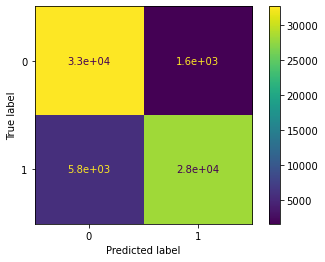

In [12]:
clf = RandomForestClassifier(random_state=42,max_depth= 15)
#clf = DecisionTreeClassifier(random_state=42,max_depth=12,min_samples_leaf=5)


x_train, x_val, y_train, y_val = train_test_split(data_X_new, data_Y, test_size = 0.3, shuffle = True)

print("before training")
clf.fit(x_train, y_train)
print("finished training")

y_pred = clf.predict(x_val)
print("finished predicting")
print(y_pred.shape[0])
print(sum(y_pred==0))
print(sum(y_pred==1))
print(sum(y_pred==1)/y_pred.shape[0])

print(f1_score(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))
plot_confusion_matrix(clf, x_val, y_val)

In [ ]:
#select same columns of test_data
data_test_X = data_test.drop(columns=['id'])
print(data_test_X.shape)

In [ ]:
data_test_X  = sc.transform(data_test_X)
data_test_X = selector.transform(data_test_X)


#fit the model with the whole data
clf.fit(data_X_new,data_Y)
#predict the data
y_target = clf.predict(data_test_X)
print(sum(y_target==0))
print(sum(y_target==1))

In [ ]:
data_out = pd.DataFrame(data_test['id'].copy())
data_out.insert(1, "target", y_target, True) 
data_out.to_csv('submission.csv',index=False)